In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import random_projection
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import drive

%matplotlib inline
drive.mount('/content/gdrive', force_remount=True)
RANDOM_STATE = 42

Mounted at /content/gdrive


In [2]:
train_dir = "/content/gdrive/MyDrive/Colab Notebooks/data/train"
test_dir = "/content/gdrive/MyDrive/Colab Notebooks/data/test"
valid_dir = "/content/gdrive/MyDrive/Colab Notebooks/data/valid"

In [3]:
train_set = []
count = 0
for package in os.listdir(train_dir):
    path = os.path.join(train_dir, package)
    for im in os.listdir(path):
        image = load_img(os.path.join(path, im), target_size = (224,224,3))
        image = img_to_array(image)
        image = image / 255.0
        train_set += [[image,count]]
    count += 1

In [4]:
test_set = []
count = 0
for package in os.listdir(test_dir):
    path = os.path.join(test_dir, package)
    for im in os.listdir(path):
        image = load_img(os.path.join(path, im), target_size = (224,224,3))
        image = img_to_array(image)
        image = image / 255.0
        test_set += [[image,count]]
    count += 1

In [5]:
valid_set = []
count = 0
for package in os.listdir(valid_dir):
    path = os.path.join(valid_dir, package)
    for im in os.listdir(path):
        image = load_img(os.path.join(path, im), target_size = (224,224,3))
        image = img_to_array(image)
        image = image / 255.0
        valid_set += [[image,count]]
    count += 1

In [6]:
X_train, y_train = zip(*train_set)
X_test, y_test = zip(*test_set)
X_valid, y_valid = zip(*valid_set)

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

In [8]:
y_train = np.array(to_categorical(y_train))
y_test = np.array(to_categorical(y_test))
y_valid = np.array(to_categorical(y_valid))

In [9]:
X_train.shape[0]

900

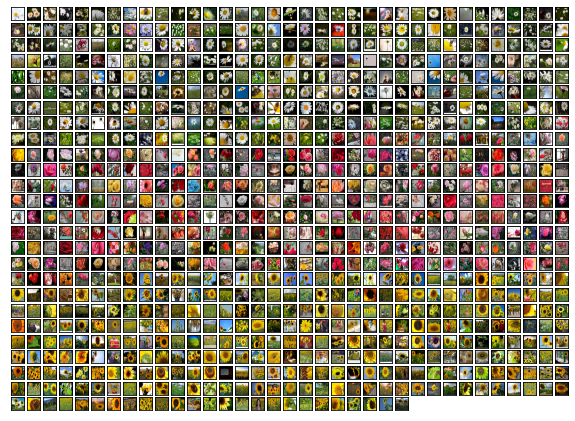

In [10]:
plt.figure(figsize = (10, 10))
i_subplot = 1 
for i in range(X_train.shape[0]):
    plt.subplot(35, 35, i_subplot)
    i_subplot += 1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X_train[i, :], (224,224,3)))

In [11]:
train_class_names = []
for file in os.listdir(train_dir):
    train_class_names += [file]
    
labels = []
for item in y_train: 
  labels.append(train_class_names[item.argmax()])

y_train = np.array(labels)
y_train

array(['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'dai

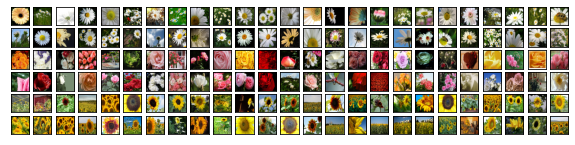

In [12]:
plt.figure(figsize = (10, 10))
i_subplot = 1 
for i in range(X_test.shape[0]):
    plt.subplot(25,25, i_subplot)
    i_subplot += 1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X_test[i, :], (224,224,3)))

In [13]:
test_class_names = []
for file in os.listdir(test_dir):
    test_class_names += [file]
    
labels = []
for item in y_test:
  labels.append(test_class_names[item.argmax()])

y_test = np.array(labels)
y_test

array(['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'sunflower', 'sunflower', 'sunflower',
       'sunfl

In [14]:
X_train = X_train.reshape((len(X_train), 224 * 224 * 3))
X_test = X_test.reshape((len(X_test), 224 * 224 * 3))
X_valid = X_valid.reshape((len(X_valid), 224 * 224 * 3))

In [15]:
val_class_names = []
for file in os.listdir(valid_dir):
    val_class_names += [file]
    
labels = []
for item in y_valid:
  labels.append(val_class_names[item.argmax()])

y_valid = np.array(labels)

In [17]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
y_test_pred = model.predict(X_test)

In [19]:
print('Accuracy on test data (n_neighbors = 4): ', metrics.accuracy_score(y_test, y_test_pred))
print('Loss on test data: (n_neighbors = 4):    ', np.mean(y_test != y_test_pred))

Accuracy on test data (n_neighbors = 4):  0.64
Loss on test data: (n_neighbors = 4):     0.36


In [20]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[34, 14,  2],
       [ 9, 40,  1],
       [15, 13, 22]])

In [21]:
dict(zip(test_class_names, list(range(len(test_class_names)))))

{'daisy': 0, 'rose': 1, 'sunflower': 2}

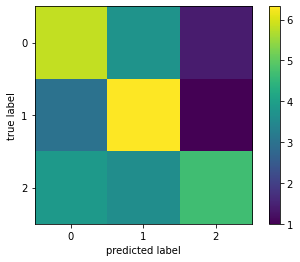

In [22]:
M = metrics.confusion_matrix(y_test, y_test_pred)
M = np.sqrt(M)
plt.imshow(M, interpolation='nearest')
plt.xticks(range(len(test_class_names)))
plt.yticks(range(len(test_class_names)))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

In [23]:
kk = range(1, 15, 1)
err_train = []
err_test = []
for k in kk:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

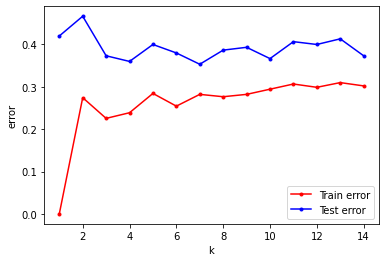

In [24]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error') 
plt.xlabel('k')   
plt.ylabel('error')   
plt.legend(loc = 4)

In [25]:
min(err_test)

0.35333333333333333

In [26]:
kk[err_test.index(min(err_test))]

7

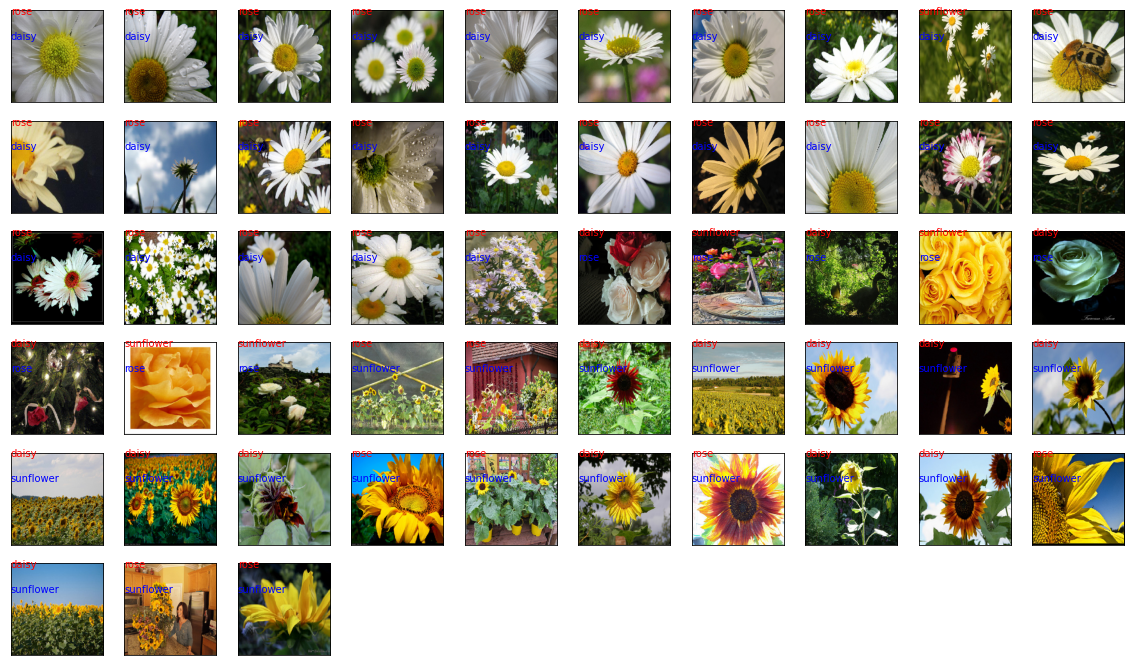

In [39]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
i=1
plt.figure(figsize = (20, 20))
i_subplot = 1 
yi_test_pred = model.predict(X_test)
for i in range(X_test.shape[0]):
    if yi_test_pred[i] != y_test[i]:
        plt.subplot(10, 10, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.reshape(X_test[i, :], (224,224,3)), cmap = plt.cm.binary)
        plt.text(0, 70, str(y_test[i]), color = 'b')        
        plt.text(0, 10, str(yi_test_pred[i]), color = 'r')

In [40]:
print('Accuracy on test data (n_neighbors = 7): ', metrics.accuracy_score(y_test, yi_test_pred))
print('Loss on test data (n_neighbors = 7):     ', np.mean(y_test != yi_test_pred))

Accuracy on test data (n_neighbors = 7):  0.6466666666666666
Loss on test data (n_neighbors = 7):      0.35333333333333333


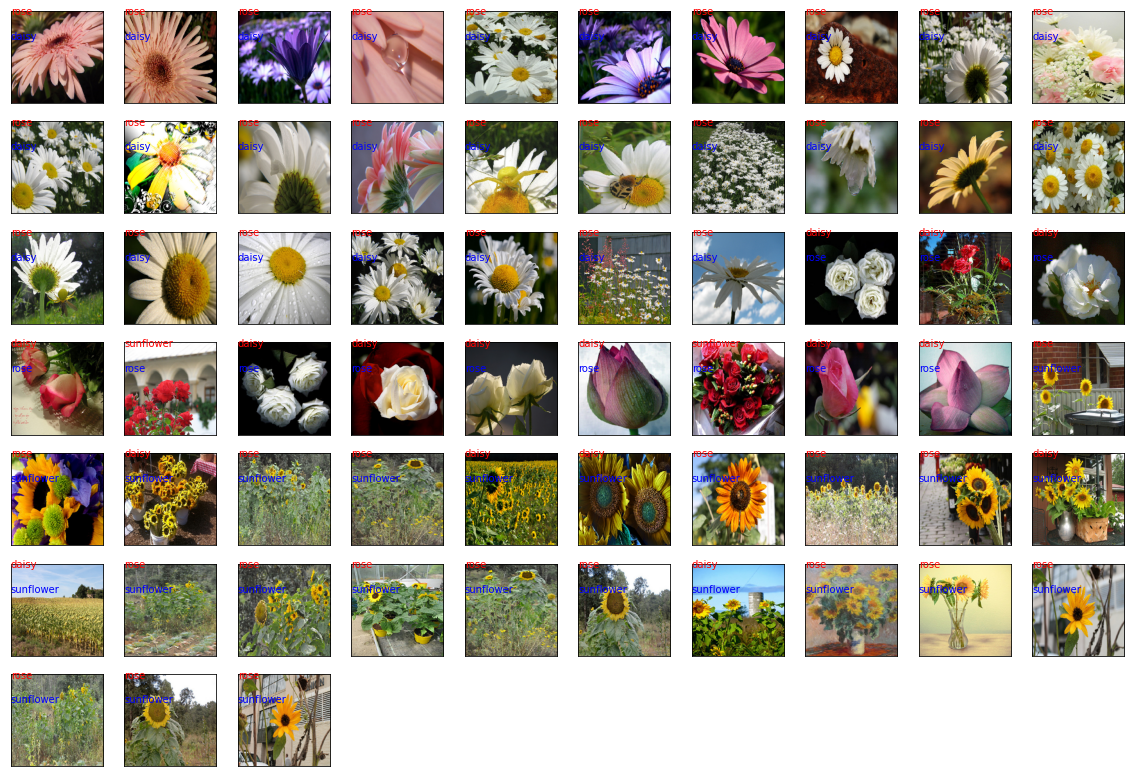

In [37]:
i=1
plt.figure(figsize = (20, 20))
i_subplot = 1 
yi_valid_pred = model.predict(X_valid)
for i in range(X_valid.shape[0]):
    if yi_valid_pred[i] != y_valid[i]:
        plt.subplot(10, 10, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.reshape(X_valid[i, :], (224,224,3)), cmap = plt.cm.binary)
        plt.text(0, 70, str(y_valid[i]), color = 'b')        
        plt.text(0, 10, str(yi_valid_pred[i]), color = 'r')

In [38]:
print('Accuracy on validation data (n_neighbors = 7): ', metrics.accuracy_score(y_valid, yi_valid_pred))
print('Loss on validation data (n_neighbors = 7):     ', np.mean(y_valid != yi_valid_pred))

Accuracy on validation data (n_neighbors = 7):  0.58
Loss on validation data (n_neighbors = 7):      0.42
